In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import time

In [248]:
heart = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
#heart2 = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [249]:
dataset = heart

In [250]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [251]:
#filtering outliers retaining only those data points which are below threshhold
#dataset = dataset[(z < 3).all(axis=1)]


In [252]:
dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [253]:
dataset = dataset.drop('id', axis=1)
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column .
dataset['ever_married']= label_encoder.fit_transform(dataset['ever_married'])
dataset['work_type']= label_encoder.fit_transform(dataset['work_type'])
dataset['Residence_type']= label_encoder.fit_transform(dataset['Residence_type'])
dataset['smoking_status']= label_encoder.fit_transform(dataset['smoking_status'])
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
dataset

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             202.21   NaN               2       1  
2                  0             105.92  32.5               2       1  
3                  1             171.23  34.4               3       1  
4                  0             174.12  24.0               2       1  
...              ...                ...   ...             ...     ...  
5105               1              83.75   NaN               2       0  
5106               1             125.20  40.0               2       0  
5107               0              82.99  30.6               2       0  
5108               0             166.29  25.6               1       0  
5109               1              85.28  26.2               0       0  

[5110 rows x 11 columns]

In [254]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [255]:
X = dataset.iloc[:, 0:-1].values

y = dataset.iloc[:, -1].values

In [256]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [257]:
!pip3 install imblearn --user

In [258]:
#from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [259]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (9722, 10)
After OverSampling, the shape of train_y: (9722,) 

After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861


## Train the LG Classifier

In [260]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            
            t0= time.time()
            if (param == 0):
                model = LogisticRegression()
                
            else:
                model = LogisticRegression(C=param['C'], penalty = param['penalty'])

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)

    plt.figure(figsize=(10,6))
    plt.plot(range(0,30),accuracy_10,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('checking the variance in 30 iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()

   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



In [261]:
dict_LG = {}

## First Model without preprocessing 

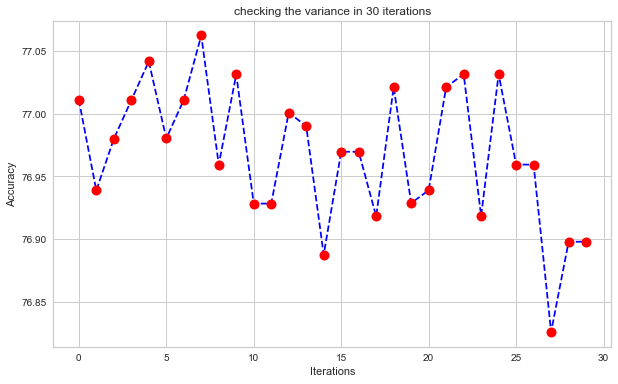

{'LG': [76.96843195637493,
  77.11408735533242,
  75.3915338250109,
  76.96843195637493,
  76.9469695053829,
  85.00141233123286,
  0.0068784197171529145]}

In [173]:
X = x_train_res
y = y_train_res

#from collections import defaultdict
scaled_features = standardise(X)


param = 0
X=scaled_features
result = calculate_model(param,X,y)
    
dict_LG['LG'] = result
dict_LG


In [1]:
#!pip3 install shap --user

  Using cached shap-0.40.0-cp38-cp38-win_amd64.whl (431 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [263]:
import shap

## K-means

In [264]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


X = x_train_res
y_old =  y_train_res

scaled_features = standardise(X)


model = KMeans()
#visualizer = KElbowVisualizer(model, k=(1,12)).fit(scaled_features)
#visualizer.show()

In [265]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(scaled_features)

In [266]:
y= kmeans.predict(scaled_features)

In [267]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [268]:
df = pd.DataFrame(scaled_features , columns= ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
#df['Cluster'] = y
#df['actual'] = y_old
df.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0  1.246341  0.539165     -0.516899       3.068462      0.576421  -0.091028   
1 -0.939105  0.268147     -0.516899      -0.421251      0.576421   0.970888   
2  1.246341  1.126372     -0.516899       3.068462      0.576421  -0.091028   
3 -0.939105 -0.273890     -0.516899      -0.421251      0.576421  -0.091028   
4 -0.939105  1.081203      2.429132      -0.421251      0.576421   0.970888   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0        1.026140           2.008011  1.094654       -0.452125  
1       -1.150287           1.526809 -0.075510        0.592880  
2       -1.150287          -0.222998  0.472126        0.592880  
3        1.026140           0.963832  0.760615        1.637885  
4       -1.150287           1.016350 -0.818479        0.592880

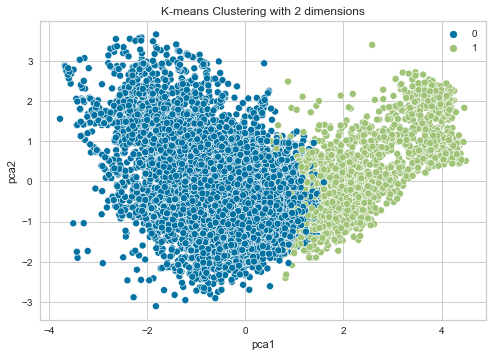

In [269]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(scaled_features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

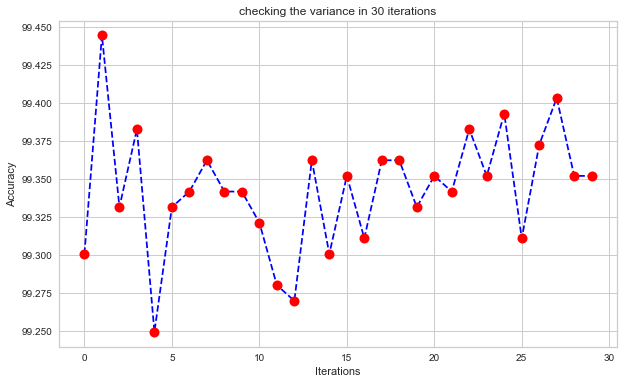

[99.34306840242088,
 99.34393132134629,
 99.15285403509823,
 99.34306840242088,
 99.33988080478703,
 99.98111314118094,
 0.05171059528986614]

In [270]:

                                                   
param =0
#print(param)

result = calculate_model(param,X,y)
dict_LG['kmeans_2_clusters'] = result
result

In [271]:
dict_LG

{'LG': [76.96843195637493,
  77.11408735533242,
  75.3915338250109,
  76.96843195637493,
  76.9469695053829,
  85.00141233123286,
  0.0068784197171529145],
 'kmeans_2_clusters': [99.34306840242088,
  99.34393132134629,
  99.15285403509823,
  99.34306840242088,
  99.33988080478703,
  99.98111314118094,
  0.05171059528986614]}

## shap visualization  on 2 clusters 

In [36]:
import shap
#shap.initjs()

In [37]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[21:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|===================| 9711/9722 [00:15<00:00]        

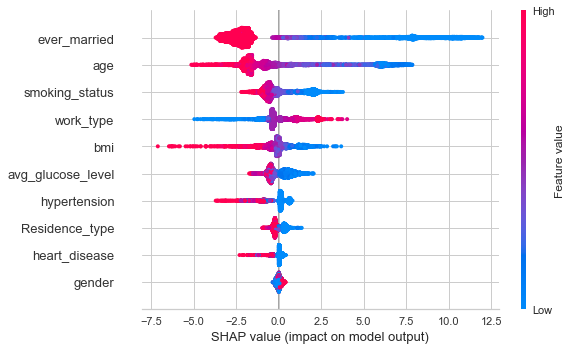

In [38]:
shap.plots.beeswarm(shap_values)

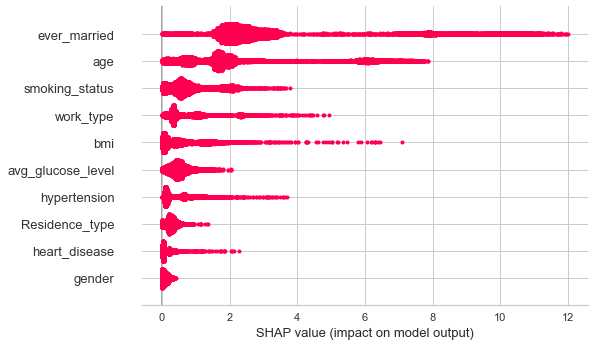

In [39]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

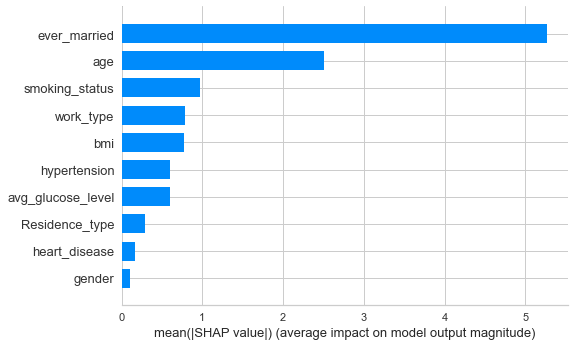

In [40]:
shap_values = shap.TreeExplainer(model).shap_values(df)
shap.summary_plot(shap_values, df, plot_type="bar")

In [ ]:
#gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status

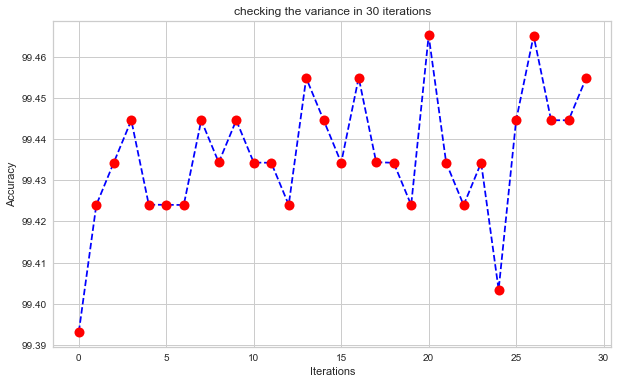

In [272]:
X=scaled_features
feat_cols = [1,2,4,5,7,8,9]

X = X[:,feat_cols]

param =0
#print(param)

#X=scaled_features
result = calculate_model(param,X,y)
result
dict_LG['kmeans+Shap'] = result

In [273]:
dict_LG

{'LG': [76.96843195637493,
  77.11408735533242,
  75.3915338250109,
  76.96843195637493,
  76.9469695053829,
  85.00141233123286,
  0.0068784197171529145],
 'kmeans_2_clusters': [99.34306840242088,
  99.34393132134629,
  99.15285403509823,
  99.34306840242088,
  99.33988080478703,
  99.98111314118094,
  0.05171059528986614],
 'kmeans+Shap': [99.43599441434505,
  99.43648573931556,
  99.03821120651033,
  99.43599441434505,
  99.43404309257645,
  99.98872820742625,
  0.012452559471130374]}

In [274]:
df_dict = pd.DataFrame.from_dict(dict_LG,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG                 76.968432  77.114087    75.391534  76.968432  76.946970   
kmeans_2_clusters  99.343068  99.343931    99.152854  99.343068  99.339881   
kmeans+Shap        99.435994  99.436486    99.038211  99.435994  99.434043   

                         Roc  CPU_time  
LG                 85.001412  0.006878  
kmeans_2_clusters  99.981113  0.051711  
kmeans+Shap        99.988728  0.012453

In [277]:
# Adding Number of features
df_dict['no_of_features'] = [10,10,7]

In [278]:
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG                 76.968432  77.114087    75.391534  76.968432  76.946970   
kmeans_2_clusters  99.343068  99.343931    99.152854  99.343068  99.339881   
kmeans+Shap        99.435994  99.436486    99.038211  99.435994  99.434043   

                         Roc  CPU_time  no_of_features  
LG                 85.001412  0.006878              10  
kmeans_2_clusters  99.981113  0.051711              10  
kmeans+Shap        99.988728  0.012453               7

In [190]:
#df_dict.to_excel('xl_result/SVM_stroke_30_kmeans.xlsx')